# Data Discretization
Process of converting a continuous variable into a categorical variable of a fixed number of categories. From this process we can create new freature that can be used to train our model.\
We can use following libraries for this purpose:
* sklearn.preprocessing
* pandas

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [68]:
df = sns.load_dataset('titanic')    
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [41]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [54]:
age_null_val, fare_null_val = df[['age', 'fare']].isnull().sum()
print(f'Age null values: {age_null_val}')
print(f'Fare null values: {fare_null_val}')
print(df['age'].dtypes)
print(df['fare'].dtypes)

Age null values: 0
Fare null values: 0
float64
float64


Now there is no missing values in age and fare column

<Axes: xlabel='age', ylabel='Count'>

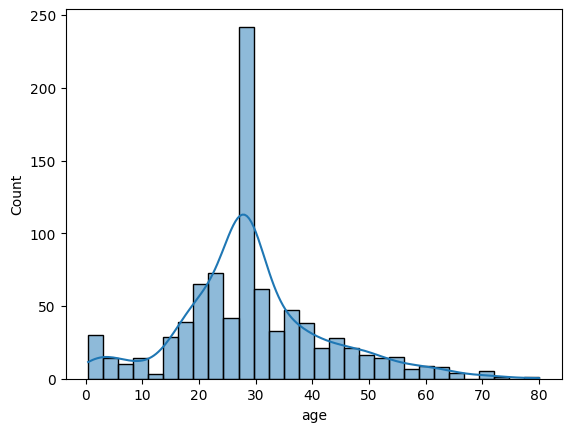

In [55]:
sns.histplot(df['age'], kde=True)

In [66]:
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_bin'] = age_discretizer.fit_transform(df[['age']]) 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin2,age_bin3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0,0,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,1,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,0,young_adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,1,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0,1,adult


<Axes: xlabel='age', ylabel='Count'>

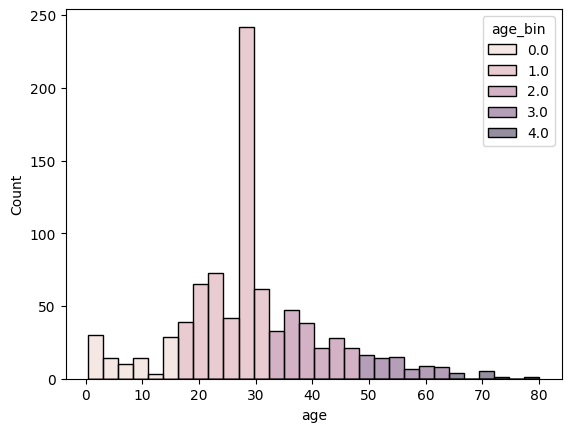

In [67]:
sns.histplot(df,x=df['age'], hue=df['age_bin'])

In [60]:
# Discretization of age by using pandas cut function
df['age_bin2'] = pd.cut(df['age'], bins = 3, labels = [0, 1, 2])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0,1


<Axes: xlabel='age', ylabel='Count'>

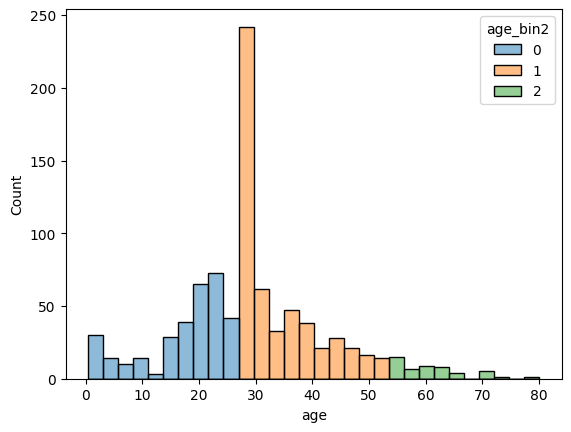

In [61]:
sns.histplot(df,x = df['age'], hue = df['age_bin2'])

In [63]:
# we can also define the the bins manually
bins = [0, 10, 18, 30, 50, 80]
labels = ['child', 'teenager', 'young_adult', 'adult', 'senior']
df['age_bin3'] = pd.cut(df['age'], bins= bins, labels = labels)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin2,age_bin3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0,0,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,1,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,0,young_adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,1,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0,1,adult
